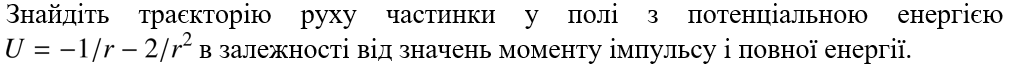

$E = \frac{m \dot{r}^2}{2} + \frac{m r^2 \dot{\varphi}^2}{2} + U(r) = 0$

Обобщённый импульс по $\varphi$ он же момент количества движения

$P_{\varphi} = M = m r^2 \dot{\varphi}$

откуда

$\dot{\varphi} =\frac{M}{ m r^2} $


$U_{eff}(r) = \frac{M^2}{2 m r^2} + U(r)$

$E = \frac{m \dot{r}^2}{2} + \frac{M^2}{2 m r^2} + U(r) = 0$

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [72]:
t = var("t")
R = var("r")
r = function("r")(t)
M = var("M")
E = var("E")

m = var("m")

U = -1/r - 1/r^2

u_eff = function("U_eff")(R)
disp(u_eff)

U_eff = M^2/(2*m*r^2) + U
disp(U_eff)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [73]:
eq_E = E == m * r.diff(t)^2 + U_eff
disp(eq_E)

<IPython.core.display.Math object>

In [74]:
eq_Eu = E == m * r.diff(t)^2 + u_eff
disp(eq_Eu)

<IPython.core.display.Math object>

In [75]:
sol_ru_diff_t = solve(eq_Eu, r.diff(t))
disp(sol_ru_diff_t)

<IPython.core.display.Math object>

In [76]:
sol_r_diff_t = solve(eq_E, r.diff(t))
disp(sol_r_diff_t)

<IPython.core.display.Math object>

In [77]:
dru_dt = sol_ru_diff_t[1].rhs()
displ("\\frac{dr}{dt} =" + latex(dru_dt))

<IPython.core.display.Math object>

условие $E > U_{eff}(r)$ является необходимым для получения действительных решений задачи поиска максимального и минимального радиуса

In [84]:
sol_real = solve(E - U_eff.subs(r == R) == 0, R)
disp(sol_real)

<IPython.core.display.Math object>

In [56]:
dr_dt = sol_r_diff_t[1].rhs()
displ("\\frac{dr}{dt} =" + latex(dr_dt))

<IPython.core.display.Math object>

In [57]:
(dt_dr) = (1/dr_dt)
displ("dt = " + latex(dt_dr) + "\\, dr")

<IPython.core.display.Math object>

поскольку

$\dot{\varphi} =\frac{M}{ m r^2} $


$d{\varphi} =\frac{M}{ m r^2}\,dt$

In [58]:
dphi_dr = M/(m*r^2) * dt_dr
displ("d{\\varphi} = " +latex(dphi_dr) + "\\, dr")

<IPython.core.display.Math object>

точки перигея и эпогея определяются 

$\frac{dr}{d{\varphi}} = 0$

In [59]:
dr_dphi = 1/dphi_dr
displ("\\frac{dr}{d{\\varphi}} =" + latex(dr_dphi))

<IPython.core.display.Math object>

In [60]:
dR_dphi = dr_dphi.subs(r == R)
displ("\\frac{dr}{d{\\varphi}} =" + latex(dR_dphi))

<IPython.core.display.Math object>

In [61]:
sol_R_min_max = solve(dR_dphi == 0, R)
disp(sol_R_min_max)

<IPython.core.display.Math object>

In [64]:
values = [
    E == -1,
    M == 1,
    m == 1
]

In [65]:
for sol_i_R_min_max in sol_R_min_max:
    disp(sol_i_R_min_max.subs(values))
    disp(sol_i_R_min_max.subs(values).rhs().n())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>